In [11]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [12]:
data = pd.read_csv('music_genre.csv')
print(data.head())

# C'est un dataset qui contient des informations sur les genres musicaux et les artistes qui les ont créés. 

   instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.2

In [13]:
print(data.shape)

# 50005 lignes

(50005, 18)


In [18]:
print(data.columns)
print(len(data.columns))

# 18 colonnes

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')
18


In [15]:
print(data.music_genre.unique())
print(data.music_genre.value_counts())

# 10 genres de musique, 5000 éléments par genre


['Electronic' 'Anime' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues'
 'Rock' 'Classical' 'Hip-Hop']
music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


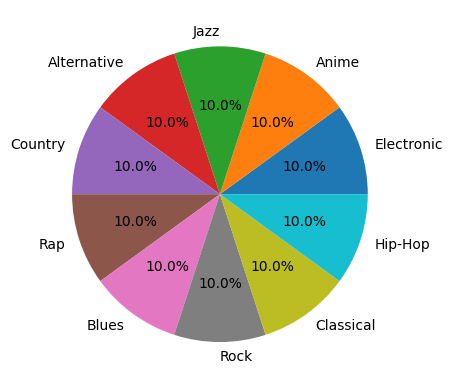

In [20]:
labels = data.music_genre.value_counts().index
sizes = data.music_genre.value_counts().values

fig = plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

# la donnée est distribuée uniformément entre les genres de musique

In [30]:
colonnesCat = [x for x in data.columns if data[x].dtype == object]
colonnesNum = [x for x in data.columns if data[x].dtype == float]

print(f'Colonnes catégoriques: {len(colonnesCat)} ({colonnesCat})')
print(f'Colonnes numériques: {len(colonnesNum)} ({colonnesNum})')

print(data.tempo.dtype) 

# tempo est un type object alors qu'il contient 

Colonnes catégoriques: 7 (['artist_name', 'track_name', 'key', 'mode', 'tempo', 'obtained_date', 'music_genre'])
Colonnes numériques: 11 (['instance_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence'])
object
